In [14]:
import pandas as pd
from google.cloud import bigquery
from google.oauth2 import service_account

from sklearn.model_selection import TimeSeriesSplit

pd.set_option('display.max_columns', None)

def get_data_from_bigquery():
    credentials = service_account.Credentials.from_service_account_file("../../config/chessthesis_service_account.json")

    bqclient = bigquery.Client(credentials = credentials)

    # Download query results.
    query_string = """
    SELECT *
    FROM chess_thesis.games_with_features
    ORDER BY year, month, day ASC
    """

    dataframe = (
        bqclient.query(query_string)
        .result()
        .to_dataframe(
            # Optionally, explicitly request to use the BigQuery Storage API. As of
            # google-cloud-bigquery version 1.26.0 and above, the BigQuery Storage
            # API is used by default.
            create_bqstorage_client=True,
        )
    )

    return dataframe

In [8]:
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)
all_splits = list(tscv.split(df.drop(["result", "id"], axis=1), df["result"]))
train_0, test_0 = all_splits[0]

In [9]:
df.drop(["result", "id"], axis=1).iloc[train_0]

,white_elo,black_elo,eco,year,month,day,day_of_week,white_title,black_title,white_age,black_age,games_played_last_three_months_white,games_played_last_three_months_black,games_played_last_six_months_white,games_played_last_six_months_black,games_played_last_twelve_months_white,games_played_last_twelve_months_black,games_played_last_two_years_white,games_played_last_two_years_black,games_played_last_four_years_white,games_played_last_four_years_black,games_played_last_ten_years_white,games_played_last_ten_years_black,opponent_rating_avg_last_three_months_white,opponent_rating_avg_last_three_months_black,opponent_rating_avg_last_six_months_white,opponent_rating_avg_last_six_months_black,opponent_rating_avg_last_twelve_months_white,opponent_rating_avg_last_twelve_months_black,opponent_rating_avg_last_two_years_white,opponent_rating_avg_last_two_years_black,opponent_rating_avg_last_four_years_white,opponent_rating_avg_last_four_years_black,opponent_rating_avg_last_ten_years_white,opponent_rating_avg_last_ten_years_black,opponent_rating_min_last_three_months_white,opponent_rating_min_last_three_months_black,opponent_rating_min_last_six_months_white,opponent_rating_min_last_six_months_black,opponent_rating_min_last_twelve_months_white,opponent_rating_min_last_twelve_months_black,opponent_rating_min_last_two_years_white,opponent_rating_min_last_two_years_black,opponent_rating_min_last_four_years_white,opponent_rating_min_last_four_years_black,opponent_rating_min_last_ten_years_white,opponent_rating_min_last_ten_years_black,opponent_rating_max_last_three_months_white,opponent_rating_max_last_three_months_black,opponent_rating_max_last_six_months_white,opponent_rating_max_last_six_months_black,opponent_rating_max_last_twelve_months_white,opponent_rating_max_last_twelve_months_black,opponent_rating_max_last_two_years_white,opponent_rating_max_last_two_years_black,opponent_rating_max_last_four_years_white,opponent_rating_max_last_four_years_black,opponent_rating_max_last_ten_years_white,opponent_rating_max_last_ten_years_black,rolling_three_months_performance_white,rolling_three_months_performance_black,rolling_six_months_performance_white,rolling_six_months_performance_black,rolling_twelve_months_performance_white,rolling_twelve_months_performance_black,rolling_two_years_performance_white,rolling_two_years_performance_black,rolling_four_years_performance_white,rolling_four_years_performance_black,rolling_ten_years_performance_white,rolling_ten_years_performance_black,avg_eval_diff_last_three_months_white,avg_eval_diff_last_three_months_black,avg_eval_diff_last_six_months_white,avg_eval_diff_last_six_months_black,avg_eval_diff_last_twelve_months_white,avg_eval_diff_last_twelve_months_black,avg_eval_diff_last_two_years_white,avg_eval_diff_last_two_years_black,avg_eval_diff_last_four_years_white,avg_eval_diff_last_four_years_black,avg_eval_diff_last_ten_years_white,avg_eval_diff_last_ten_years_black,best_moves_ratio_last_three_months_white,best_moves_ratio_last_three_months_black,best_moves_ratio_last_six_months_white,best_moves_ratio_last_six_months_black,best_moves_ratio_last_twelve_months_white,best_moves_ratio_last_twelve_months_black,best_moves_ratio_last_two_years_white,best_moves_ratio_last_two_years_black,best_moves_ratio_last_four_years_white,best_moves_ratio_last_four_years_black,best_moves_ratio_last_ten_years_white,best_moves_ratio_last_ten_years_black,great_moves_ratio_last_three_months_white,great_moves_ratio_last_three_months_black,great_moves_ratio_last_six_months_white,great_moves_ratio_last_six_months_black,great_moves_ratio_last_twelve_months_white,great_moves_ratio_last_twelve_months_black,great_moves_ratio_last_two_years_white,great_moves_ratio_last_two_years_black,great_moves_ratio_last_four_years_white,great_moves_ratio_last_four_years_black,great_moves_ratio_last_ten_years_white,great_moves_ratio_last_ten_years_black,good_moves_ratio_last_three_months_white,good_moves_ratio_last_three_months_black,good_moves_ratio_l

In [10]:
train_1, test_1 = all_splits[1]
df.drop(["result", "id"], axis=1).iloc[train_1]


,white_elo,black_elo,eco,year,month,day,day_of_week,white_title,black_title,white_age,black_age,games_played_last_three_months_white,games_played_last_three_months_black,games_played_last_six_months_white,games_played_last_six_months_black,games_played_last_twelve_months_white,games_played_last_twelve_months_black,games_played_last_two_years_white,games_played_last_two_years_black,games_played_last_four_years_white,games_played_last_four_years_black,games_played_last_ten_years_white,games_played_last_ten_years_black,opponent_rating_avg_last_three_months_white,opponent_rating_avg_last_three_months_black,opponent_rating_avg_last_six_months_white,opponent_rating_avg_last_six_months_black,opponent_rating_avg_last_twelve_months_white,opponent_rating_avg_last_twelve_months_black,opponent_rating_avg_last_two_years_white,opponent_rating_avg_last_two_years_black,opponent_rating_avg_last_four_years_white,opponent_rating_avg_last_four_years_black,opponent_rating_avg_last_ten_years_white,opponent_rating_avg_last_ten_years_black,opponent_rating_min_last_three_months_white,opponent_rating_min_last_three_months_black,opponent_rating_min_last_six_months_white,opponent_rating_min_last_six_months_black,opponent_rating_min_last_twelve_months_white,opponent_rating_min_last_twelve_months_black,opponent_rating_min_last_two_years_white,opponent_rating_min_last_two_years_black,opponent_rating_min_last_four_years_white,opponent_rating_min_last_four_years_black,opponent_rating_min_last_ten_years_white,opponent_rating_min_last_ten_years_black,opponent_rating_max_last_three_months_white,opponent_rating_max_last_three_months_black,opponent_rating_max_last_six_months_white,opponent_rating_max_last_six_months_black,opponent_rating_max_last_twelve_months_white,opponent_rating_max_last_twelve_months_black,opponent_rating_max_last_two_years_white,opponent_rating_max_last_two_years_black,opponent_rating_max_last_four_years_white,opponent_rating_max_last_four_years_black,opponent_rating_max_last_ten_years_white,opponent_rating_max_last_ten_years_black,rolling_three_months_performance_white,rolling_three_months_performance_black,rolling_six_months_performance_white,rolling_six_months_performance_black,rolling_twelve_months_performance_white,rolling_twelve_months_performance_black,rolling_two_years_performance_white,rolling_two_years_performance_black,rolling_four_years_performance_white,rolling_four_years_performance_black,rolling_ten_years_performance_white,rolling_ten_years_performance_black,avg_eval_diff_last_three_months_white,avg_eval_diff_last_three_months_black,avg_eval_diff_last_six_months_white,avg_eval_diff_last_six_months_black,avg_eval_diff_last_twelve_months_white,avg_eval_diff_last_twelve_months_black,avg_eval_diff_last_two_years_white,avg_eval_diff_last_two_years_black,avg_eval_diff_last_four_years_white,avg_eval_diff_last_four_years_black,avg_eval_diff_last_ten_years_white,avg_eval_diff_last_ten_years_black,best_moves_ratio_last_three_months_white,best_moves_ratio_last_three_months_black,best_moves_ratio_last_six_months_white,best_moves_ratio_last_six_months_black,best_moves_ratio_last_twelve_months_white,best_moves_ratio_last_twelve_months_black,best_moves_ratio_last_two_years_white,best_moves_ratio_last_two_years_black,best_moves_ratio_last_four_years_white,best_moves_ratio_last_four_years_black,best_moves_ratio_last_ten_years_white,best_moves_ratio_last_ten_years_black,great_moves_ratio_last_three_months_white,great_moves_ratio_last_three_months_black,great_moves_ratio_last_six_months_white,great_moves_ratio_last_six_months_black,great_moves_ratio_last_twelve_months_white,great_moves_ratio_last_twelve_months_black,great_moves_ratio_last_two_years_white,great_moves_ratio_last_two_years_black,great_moves_ratio_last_four_years_white,great_moves_ratio_last_four_years_black,great_moves_ratio_last_ten_years_white,great_moves_ratio_last_ten_years_black,good_moves_ratio_last_three_months_white,good_moves_ratio_last_three_months_black,good_moves_ratio_l

In [11]:
df.drop(["result", "id"], axis=1).iloc[test_1]

,white_elo,black_elo,eco,year,month,day,day_of_week,white_title,black_title,white_age,black_age,games_played_last_three_months_white,games_played_last_three_months_black,games_played_last_six_months_white,games_played_last_six_months_black,games_played_last_twelve_months_white,games_played_last_twelve_months_black,games_played_last_two_years_white,games_played_last_two_years_black,games_played_last_four_years_white,games_played_last_four_years_black,games_played_last_ten_years_white,games_played_last_ten_years_black,opponent_rating_avg_last_three_months_white,opponent_rating_avg_last_three_months_black,opponent_rating_avg_last_six_months_white,opponent_rating_avg_last_six_months_black,opponent_rating_avg_last_twelve_months_white,opponent_rating_avg_last_twelve_months_black,opponent_rating_avg_last_two_years_white,opponent_rating_avg_last_two_years_black,opponent_rating_avg_last_four_years_white,opponent_rating_avg_last_four_years_black,opponent_rating_avg_last_ten_years_white,opponent_rating_avg_last_ten_years_black,opponent_rating_min_last_three_months_white,opponent_rating_min_last_three_months_black,opponent_rating_min_last_six_months_white,opponent_rating_min_last_six_months_black,opponent_rating_min_last_twelve_months_white,opponent_rating_min_last_twelve_months_black,opponent_rating_min_last_two_years_white,opponent_rating_min_last_two_years_black,opponent_rating_min_last_four_years_white,opponent_rating_min_last_four_years_black,opponent_rating_min_last_ten_years_white,opponent_rating_min_last_ten_years_black,opponent_rating_max_last_three_months_white,opponent_rating_max_last_three_months_black,opponent_rating_max_last_six_months_white,opponent_rating_max_last_six_months_black,opponent_rating_max_last_twelve_months_white,opponent_rating_max_last_twelve_months_black,opponent_rating_max_last_two_years_white,opponent_rating_max_last_two_years_black,opponent_rating_max_last_four_years_white,opponent_rating_max_last_four_years_black,opponent_rating_max_last_ten_years_white,opponent_rating_max_last_ten_years_black,rolling_three_months_performance_white,rolling_three_months_performance_black,rolling_six_months_performance_white,rolling_six_months_performance_black,rolling_twelve_months_performance_white,rolling_twelve_months_performance_black,rolling_two_years_performance_white,rolling_two_years_performance_black,rolling_four_years_performance_white,rolling_four_years_performance_black,rolling_ten_years_performance_white,rolling_ten_years_performance_black,avg_eval_diff_last_three_months_white,avg_eval_diff_last_three_months_black,avg_eval_diff_last_six_months_white,avg_eval_diff_last_six_months_black,avg_eval_diff_last_twelve_months_white,avg_eval_diff_last_twelve_months_black,avg_eval_diff_last_two_years_white,avg_eval_diff_last_two_years_black,avg_eval_diff_last_four_years_white,avg_eval_diff_last_four_years_black,avg_eval_diff_last_ten_years_white,avg_eval_diff_last_ten_years_black,best_moves_ratio_last_three_months_white,best_moves_ratio_last_three_months_black,best_moves_ratio_last_six_months_white,best_moves_ratio_last_six_months_black,best_moves_ratio_last_twelve_months_white,best_moves_ratio_last_twelve_months_black,best_moves_ratio_last_two_years_white,best_moves_ratio_last_two_years_black,best_moves_ratio_last_four_years_white,best_moves_ratio_last_four_years_black,best_moves_ratio_last_ten_years_white,best_moves_ratio_last_ten_years_black,great_moves_ratio_last_three_months_white,great_moves_ratio_last_three_months_black,great_moves_ratio_last_six_months_white,great_moves_ratio_last_six_months_black,great_moves_ratio_last_twelve_months_white,great_moves_ratio_last_twelve_months_black,great_moves_ratio_last_two_years_white,great_moves_ratio_last_two_years_black,great_moves_ratio_last_four_years_white,great_moves_ratio_last_four_years_black,great_moves_ratio_last_ten_years_white,great_moves_ratio_last_ten_years_black,good_moves_ratio_last_three_months_white,good_moves_ratio_last_three_months_black,good_moves_ratio_l

In [22]:
train_2, test_2 = all_splits[2]
df.drop(["result", "id"], axis=1).iloc[train_2]

,white_elo,black_elo,eco,year,month,day,day_of_week,white_title,black_title,white_age,black_age,games_played_last_three_months_white,games_played_last_three_months_black,games_played_last_six_months_white,games_played_last_six_months_black,games_played_last_twelve_months_white,games_played_last_twelve_months_black,games_played_last_two_years_white,games_played_last_two_years_black,games_played_last_four_years_white,games_played_last_four_years_black,games_played_last_ten_years_white,games_played_last_ten_years_black,opponent_rating_avg_last_three_months_white,opponent_rating_avg_last_three_months_black,opponent_rating_avg_last_six_months_white,opponent_rating_avg_last_six_months_black,opponent_rating_avg_last_twelve_months_white,opponent_rating_avg_last_twelve_months_black,opponent_rating_avg_last_two_years_white,opponent_rating_avg_last_two_years_black,opponent_rating_avg_last_four_years_white,opponent_rating_avg_last_four_years_black,opponent_rating_avg_last_ten_years_white,opponent_rating_avg_last_ten_years_black,opponent_rating_min_last_three_months_white,opponent_rating_min_last_three_months_black,opponent_rating_min_last_six_months_white,opponent_rating_min_last_six_months_black,opponent_rating_min_last_twelve_months_white,opponent_rating_min_last_twelve_months_black,opponent_rating_min_last_two_years_white,opponent_rating_min_last_two_years_black,opponent_rating_min_last_four_years_white,opponent_rating_min_last_four_years_black,opponent_rating_min_last_ten_years_white,opponent_rating_min_last_ten_years_black,opponent_rating_max_last_three_months_white,opponent_rating_max_last_three_months_black,opponent_rating_max_last_six_months_white,opponent_rating_max_last_six_months_black,opponent_rating_max_last_twelve_months_white,opponent_rating_max_last_twelve_months_black,opponent_rating_max_last_two_years_white,opponent_rating_max_last_two_years_black,opponent_rating_max_last_four_years_white,opponent_rating_max_last_four_years_black,opponent_rating_max_last_ten_years_white,opponent_rating_max_last_ten_years_black,rolling_three_months_performance_white,rolling_three_months_performance_black,rolling_six_months_performance_white,rolling_six_months_performance_black,rolling_twelve_months_performance_white,rolling_twelve_months_performance_black,rolling_two_years_performance_white,rolling_two_years_performance_black,rolling_four_years_performance_white,rolling_four_years_performance_black,rolling_ten_years_performance_white,rolling_ten_years_performance_black,avg_eval_diff_last_three_months_white,avg_eval_diff_last_three_months_black,avg_eval_diff_last_six_months_white,avg_eval_diff_last_six_months_black,avg_eval_diff_last_twelve_months_white,avg_eval_diff_last_twelve_months_black,avg_eval_diff_last_two_years_white,avg_eval_diff_last_two_years_black,avg_eval_diff_last_four_years_white,avg_eval_diff_last_four_years_black,avg_eval_diff_last_ten_years_white,avg_eval_diff_last_ten_years_black,best_moves_ratio_last_three_months_white,best_moves_ratio_last_three_months_black,best_moves_ratio_last_six_months_white,best_moves_ratio_last_six_months_black,best_moves_ratio_last_twelve_months_white,best_moves_ratio_last_twelve_months_black,best_moves_ratio_last_two_years_white,best_moves_ratio_last_two_years_black,best_moves_ratio_last_four_years_white,best_moves_ratio_last_four_years_black,best_moves_ratio_last_ten_years_white,best_moves_ratio_last_ten_years_black,great_moves_ratio_last_three_months_white,great_moves_ratio_last_three_months_black,great_moves_ratio_last_six_months_white,great_moves_ratio_last_six_months_black,great_moves_ratio_last_twelve_months_white,great_moves_ratio_last_twelve_months_black,great_moves_ratio_last_two_years_white,great_moves_ratio_last_two_years_black,great_moves_ratio_last_four_years_white,great_moves_ratio_last_four_years_black,great_moves_ratio_last_ten_years_white,great_moves_ratio_last_ten_years_black,good_moves_ratio_last_three_months_white,good_moves_ratio_last_three_months_black,good_moves_ratio_l

In [18]:
df.drop(["result", "id"], axis=1).iloc[test_1]

,white_elo,black_elo,eco,year,month,day,day_of_week,white_title,black_title,white_age,black_age,games_played_last_three_months_white,games_played_last_three_months_black,games_played_last_six_months_white,games_played_last_six_months_black,games_played_last_twelve_months_white,games_played_last_twelve_months_black,games_played_last_two_years_white,games_played_last_two_years_black,games_played_last_four_years_white,games_played_last_four_years_black,games_played_last_ten_years_white,games_played_last_ten_years_black,opponent_rating_avg_last_three_months_white,opponent_rating_avg_last_three_months_black,opponent_rating_avg_last_six_months_white,opponent_rating_avg_last_six_months_black,opponent_rating_avg_last_twelve_months_white,opponent_rating_avg_last_twelve_months_black,opponent_rating_avg_last_two_years_white,opponent_rating_avg_last_two_years_black,opponent_rating_avg_last_four_years_white,opponent_rating_avg_last_four_years_black,opponent_rating_avg_last_ten_years_white,opponent_rating_avg_last_ten_years_black,opponent_rating_min_last_three_months_white,opponent_rating_min_last_three_months_black,opponent_rating_min_last_six_months_white,opponent_rating_min_last_six_months_black,opponent_rating_min_last_twelve_months_white,opponent_rating_min_last_twelve_months_black,opponent_rating_min_last_two_years_white,opponent_rating_min_last_two_years_black,opponent_rating_min_last_four_years_white,opponent_rating_min_last_four_years_black,opponent_rating_min_last_ten_years_white,opponent_rating_min_last_ten_years_black,opponent_rating_max_last_three_months_white,opponent_rating_max_last_three_months_black,opponent_rating_max_last_six_months_white,opponent_rating_max_last_six_months_black,opponent_rating_max_last_twelve_months_white,opponent_rating_max_last_twelve_months_black,opponent_rating_max_last_two_years_white,opponent_rating_max_last_two_years_black,opponent_rating_max_last_four_years_white,opponent_rating_max_last_four_years_black,opponent_rating_max_last_ten_years_white,opponent_rating_max_last_ten_years_black,rolling_three_months_performance_white,rolling_three_months_performance_black,rolling_six_months_performance_white,rolling_six_months_performance_black,rolling_twelve_months_performance_white,rolling_twelve_months_performance_black,rolling_two_years_performance_white,rolling_two_years_performance_black,rolling_four_years_performance_white,rolling_four_years_performance_black,rolling_ten_years_performance_white,rolling_ten_years_performance_black,avg_eval_diff_last_three_months_white,avg_eval_diff_last_three_months_black,avg_eval_diff_last_six_months_white,avg_eval_diff_last_six_months_black,avg_eval_diff_last_twelve_months_white,avg_eval_diff_last_twelve_months_black,avg_eval_diff_last_two_years_white,avg_eval_diff_last_two_years_black,avg_eval_diff_last_four_years_white,avg_eval_diff_last_four_years_black,avg_eval_diff_last_ten_years_white,avg_eval_diff_last_ten_years_black,best_moves_ratio_last_three_months_white,best_moves_ratio_last_three_months_black,best_moves_ratio_last_six_months_white,best_moves_ratio_last_six_months_black,best_moves_ratio_last_twelve_months_white,best_moves_ratio_last_twelve_months_black,best_moves_ratio_last_two_years_white,best_moves_ratio_last_two_years_black,best_moves_ratio_last_four_years_white,best_moves_ratio_last_four_years_black,best_moves_ratio_last_ten_years_white,best_moves_ratio_last_ten_years_black,great_moves_ratio_last_three_months_white,great_moves_ratio_last_three_months_black,great_moves_ratio_last_six_months_white,great_moves_ratio_last_six_months_black,great_moves_ratio_last_twelve_months_white,great_moves_ratio_last_twelve_months_black,great_moves_ratio_last_two_years_white,great_moves_ratio_last_two_years_black,great_moves_ratio_last_four_years_white,great_moves_ratio_last_four_years_black,great_moves_ratio_last_ten_years_white,great_moves_ratio_last_ten_years_black,good_moves_ratio_last_three_months_white,good_moves_ratio_last_three_months_black,good_moves_ratio_l

In [9]:
train_4, test_4 = all_splits[4]
df.drop(["result", "id"], axis=1).iloc[test_4]

,white_elo,black_elo,eco,year,month,day,day_of_week,white_title,black_title,white_age,black_age,games_played_last_three_months_white,games_played_last_three_months_black,games_played_last_six_months_white,games_played_last_six_months_black,games_played_last_twelve_months_white,games_played_last_twelve_months_black,games_played_last_two_years_white,games_played_last_two_years_black,games_played_last_four_years_white,games_played_last_four_years_black,games_played_last_ten_years_white,games_played_last_ten_years_black,opponent_rating_avg_last_three_months_white,opponent_rating_avg_last_three_months_black,opponent_rating_avg_last_six_months_white,opponent_rating_avg_last_six_months_black,opponent_rating_avg_last_twelve_months_white,opponent_rating_avg_last_twelve_months_black,opponent_rating_avg_last_two_years_white,opponent_rating_avg_last_two_years_black,opponent_rating_avg_last_four_years_white,opponent_rating_avg_last_four_years_black,opponent_rating_avg_last_ten_years_white,opponent_rating_avg_last_ten_years_black,opponent_rating_min_last_three_months_white,opponent_rating_min_last_three_months_black,opponent_rating_min_last_six_months_white,opponent_rating_min_last_six_months_black,opponent_rating_min_last_twelve_months_white,opponent_rating_min_last_twelve_months_black,opponent_rating_min_last_two_years_white,opponent_rating_min_last_two_years_black,opponent_rating_min_last_four_years_white,opponent_rating_min_last_four_years_black,opponent_rating_min_last_ten_years_white,opponent_rating_min_last_ten_years_black,opponent_rating_max_last_three_months_white,opponent_rating_max_last_three_months_black,opponent_rating_max_last_six_months_white,opponent_rating_max_last_six_months_black,opponent_rating_max_last_twelve_months_white,opponent_rating_max_last_twelve_months_black,opponent_rating_max_last_two_years_white,opponent_rating_max_last_two_years_black,opponent_rating_max_last_four_years_white,opponent_rating_max_last_four_years_black,opponent_rating_max_last_ten_years_white,opponent_rating_max_last_ten_years_black,rolling_three_months_performance_white,rolling_three_months_performance_black,rolling_six_months_performance_white,rolling_six_months_performance_black,rolling_twelve_months_performance_white,rolling_twelve_months_performance_black,rolling_two_years_performance_white,rolling_two_years_performance_black,rolling_four_years_performance_white,rolling_four_years_performance_black,rolling_ten_years_performance_white,rolling_ten_years_performance_black,avg_eval_diff_last_three_months_white,avg_eval_diff_last_three_months_black,avg_eval_diff_last_six_months_white,avg_eval_diff_last_six_months_black,avg_eval_diff_last_twelve_months_white,avg_eval_diff_last_twelve_months_black,avg_eval_diff_last_two_years_white,avg_eval_diff_last_two_years_black,avg_eval_diff_last_four_years_white,avg_eval_diff_last_four_years_black,avg_eval_diff_last_ten_years_white,avg_eval_diff_last_ten_years_black,best_moves_ratio_last_three_months_white,best_moves_ratio_last_three_months_black,best_moves_ratio_last_six_months_white,best_moves_ratio_last_six_months_black,best_moves_ratio_last_twelve_months_white,best_moves_ratio_last_twelve_months_black,best_moves_ratio_last_two_years_white,best_moves_ratio_last_two_years_black,best_moves_ratio_last_four_years_white,best_moves_ratio_last_four_years_black,best_moves_ratio_last_ten_years_white,best_moves_ratio_last_ten_years_black,great_moves_ratio_last_three_months_white,great_moves_ratio_last_three_months_black,great_moves_ratio_last_six_months_white,great_moves_ratio_last_six_months_black,great_moves_ratio_last_twelve_months_white,great_moves_ratio_last_twelve_months_black,great_moves_ratio_last_two_years_white,great_moves_ratio_last_two_years_black,great_moves_ratio_last_four_years_white,great_moves_ratio_last_four_years_black,great_moves_ratio_last_ten_years_white,great_moves_ratio_last_ten_years_black,good_moves_ratio_last_three_months_white,good_moves_ratio_last_three_months_black,good_moves_ratio_l

In [20]:
def preprocess_data(df):
    df["elo_diff"] = df["white_elo"] - df["black_elo"]
    df = pd.get_dummies(df, columns=['eco'])

    return df

    
new_df = preprocess_data(df)
new_df.head(1)


,id,white,white_elo,black,black_elo,result,event,round,date,year,month,day,day_of_week,site,white_title,black_title,moves,white_fide_id,black_fide_id,variation,opening,variant,white_team,black_team,eventtype,fen,setup,is_fen_extracted,white_age,black_age,game_id_white,game_id_black,player_id_white,player_id_black,player_side_white,player_side_black,opponent_rating_white,opponent_rating_black,result_white,result_black,games_played_last_three_months_white,games_played_last_three_months_black,games_played_last_six_months_white,games_played_last_six_months_black,games_played_last_twelve_months_white,games_played_last_twelve_months_black,games_played_last_two_years_white,games_played_last_two_years_black,games_played_last_four_years_white,games_played_last_four_years_black,games_played_last_ten_years_white,games_played_last_ten_years_black,opponent_rating_avg_last_three_months_white,opponent_rating_avg_last_three_months_black,opponent_rating_avg_last_six_months_white,opponent_rating_avg_last_six_months_black,opponent_rating_avg_last_twelve_months_white,opponent_rating_avg_last_twelve_months_black,opponent_rating_avg_last_two_years_white,opponent_rating_avg_last_two_years_black,opponent_rating_avg_last_four_years_white,opponent_rating_avg_last_four_years_black,opponent_rating_avg_last_ten_years_white,opponent_rating_avg_last_ten_years_black,opponent_rating_min_last_three_months_white,opponent_rating_min_last_three_months_black,opponent_rating_min_last_six_months_white,opponent_rating_min_last_six_months_black,opponent_rating_min_last_twelve_months_white,opponent_rating_min_last_twelve_months_black,opponent_rating_min_last_two_years_white,opponent_rating_min_last_two_years_black,opponent_rating_min_last_four_years_white,opponent_rating_min_last_four_years_black,opponent_rating_min_last_ten_years_white,opponent_rating_min_last_ten_years_black,opponent_rating_max_last_three_months_white,opponent_rating_max_last_three_months_black,opponent_rating_max_last_six_months_white,opponent_rating_max_last_six_months_black,opponent_rating_max_last_twelve_months_white,opponent_rating_max_last_twelve_months_black,opponent_rating_max_last_two_years_white,opponent_rating_max_last_two_years_black,opponent_rating_max_last_four_years_white,opponent_rating_max_last_four_years_black,opponent_rating_max_last_ten_years_white,opponent_rating_max_last_ten_years_black,rolling_three_months_performance_white,rolling_three_months_performance_black,rolling_six_months_performance_white,rolling_six_months_performance_black,rolling_twelve_months_performance_white,rolling_twelve_months_performance_black,rolling_two_years_performance_white,rolling_two_years_performance_black,rolling_four_years_performance_white,rolling_four_years_performance_black,rolling_ten_years_performance_white,rolling_ten_years_performance_black,avg_eval_diff_last_three_months_white,avg_eval_diff_last_three_months_black,avg_eval_diff_last_six_months_white,avg_eval_diff_last_six_months_black,avg_eval_diff_last_twelve_months_white,avg_eval_diff_last_twelve_months_black,avg_eval_diff_last_two_years_white,avg_eval_diff_last_two_years_black,avg_eval_diff_last_four_years_white,avg_eval_diff_last_four_years_black,avg_eval_diff_last_ten_years_white,avg_eval_diff_last_ten_years_black,best_moves_ratio_last_three_months_white,best_moves_ratio_last_three_months_black,best_moves_ratio_last_six_months_white,best_moves_ratio_last_six_months_black,best_moves_ratio_last_twelve_months_white,best_moves_ratio_last_twelve_months_black,best_moves_ratio_last_two_years_white,best_moves_ratio_last_two_years_black,best_moves_ratio_last_four_years_white,best_moves_ratio_last_four_years_black,best_moves_ratio_last_ten_years_white,best_moves_ratio_last_ten_years_black,great_moves_ratio_last_three_months_white,great_moves_ratio_last_three_months_black,great_moves_ratio_last_six_months_white,great_moves_ratio_last_six_months_black,great_moves_ratio_last_twelve_months_white,great_moves_ratio_last_twelve_months_black,great_moves

In [21]:
new_df.columns.values

array(['id', 'white', 'white_elo', 'black', 'black_elo', 'result',
       'event', 'round', 'date', 'year', 'month', 'day', 'day_of_week',
       'site', 'white_title', 'black_title', 'moves', 'white_fide_id',
       'black_fide_id', 'variation', 'opening', 'variant', 'white_team',
       'black_team', 'eventtype', 'fen', 'setup', 'is_fen_extracted',
       'white_age', 'black_age', 'game_id_white', 'game_id_black',
       'player_id_white', 'player_id_black', 'player_side_white',
       'player_side_black', 'opponent_rating_white',
       'opponent_rating_black', 'result_white', 'result_black',
       'games_played_last_three_months_white',
       'games_played_last_three_months_black',
       'games_played_last_six_months_white',
       'games_played_last_six_months_black',
       'games_played_last_twelve_months_white',
       'games_played_last_twelve_months_black',
       'games_played_last_two_years_white',
       'games_played_last_two_years_black',
       'games_played_last_fou

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

new_df = new_df[new_df["white_elo"].notna()]
new_df = new_df[new_df["black_elo"].notna()]
new_df = new_df[["white_elo",
                "black_elo",
                "elo_diff",
                "result",
                "white_age",
                "black_age",
 'games_played_last_three_months_white',
 'games_played_last_three_months_black',
 'games_played_last_six_months_white',
 'games_played_last_six_months_black',
 'games_played_last_twelve_months_white',
 'games_played_last_twelve_months_black',
 'games_played_last_two_years_white',
 'games_played_last_two_years_black',
 'games_played_last_four_years_white',
 'games_played_last_four_years_black',
 'games_played_last_ten_years_white',
 'games_played_last_ten_years_black',
 'opponent_rating_avg_last_three_months_white',
 'opponent_rating_avg_last_three_months_black',
 'opponent_rating_avg_last_six_months_white',
 'opponent_rating_avg_last_six_months_black',
 'opponent_rating_avg_last_twelve_months_white',
 'opponent_rating_avg_last_twelve_months_black',
 'opponent_rating_avg_last_two_years_white',
 'opponent_rating_avg_last_two_years_black',
 'opponent_rating_avg_last_four_years_white',
 'opponent_rating_avg_last_four_years_black',
 'opponent_rating_avg_last_ten_years_white',
 'opponent_rating_avg_last_ten_years_black',
 'opponent_rating_min_last_three_months_white',
 'opponent_rating_min_last_three_months_black',
 'opponent_rating_min_last_six_months_white',
 'opponent_rating_min_last_six_months_black',
 'opponent_rating_min_last_twelve_months_white',
 'opponent_rating_min_last_twelve_months_black',
 'opponent_rating_min_last_two_years_white',
 'opponent_rating_min_last_two_years_black',
 'opponent_rating_min_last_four_years_white',
 'opponent_rating_min_last_four_years_black',
 'opponent_rating_min_last_ten_years_white',
 'opponent_rating_min_last_ten_years_black',
 'opponent_rating_max_last_three_months_white',
 'opponent_rating_max_last_three_months_black',
 'opponent_rating_max_last_six_months_white',
 'opponent_rating_max_last_six_months_black',
 'opponent_rating_max_last_twelve_months_white',
 'opponent_rating_max_last_twelve_months_black',
 'opponent_rating_max_last_two_years_white',
 'opponent_rating_max_last_two_years_black',
 'opponent_rating_max_last_four_years_white',
 'opponent_rating_max_last_four_years_black',
 'opponent_rating_max_last_ten_years_white',
 'opponent_rating_max_last_ten_years_black',
 'rolling_three_months_performance_white',
 'rolling_three_months_performance_black',
 'rolling_six_months_performance_white',
 'rolling_six_months_performance_black',
 'rolling_twelve_months_performance_white',
 'rolling_twelve_months_performance_black',
 'rolling_two_years_performance_white',
 'rolling_two_years_performance_black',
 'rolling_four_years_performance_white',
 'rolling_four_years_performance_black',
 'rolling_ten_years_performance_white',
 'rolling_ten_years_performance_black',
 'avg_eval_diff_last_three_months_white',
 'avg_eval_diff_last_three_months_black',
 'avg_eval_diff_last_six_months_white',
 'avg_eval_diff_last_six_months_black',
 'avg_eval_diff_last_twelve_months_white',
 'avg_eval_diff_last_twelve_months_black',
 'avg_eval_diff_last_two_years_white',
 'avg_eval_diff_last_two_years_black',
 'avg_eval_diff_last_four_years_white',
 'avg_eval_diff_last_four_years_black',
 'avg_eval_diff_last_ten_years_white',
 'avg_eval_diff_last_ten_years_black',
 'best_moves_ratio_last_three_months_white',
 'best_moves_ratio_last_three_months_black',
 'best_moves_ratio_last_six_months_white',
 'best_moves_ratio_last_six_months_black',
 'best_moves_ratio_last_twelve_months_white',
 'best_moves_ratio_last_twelve_months_black',
 'best_moves_ratio_last_two_years_white',
 'best_moves_ratio_last_two_years_black',
 'best_moves_ratio_last_four_years_white',
 'best_moves_ratio_last_four_years_black',
 'best_moves_ratio_last_ten_years_white',
 'best_moves_ratio_last_ten_years_black',
 'great_moves_ratio_last_three_months_white',
 'great_moves_ratio_last_three_months_black',
 'great_moves_ratio_last_six_months_white',
 'great_moves_ratio_last_six_months_black',
 'great_moves_ratio_last_twelve_months_white',
 'great_moves_ratio_last_twelve_months_black',
 'great_moves_ratio_last_two_years_white',
 'great_moves_ratio_last_two_years_black',
 'great_moves_ratio_last_four_years_white',
 'great_moves_ratio_last_four_years_black',
 'great_moves_ratio_last_ten_years_white',
 'great_moves_ratio_last_ten_years_black',
 'good_moves_ratio_last_three_months_white',
 'good_moves_ratio_last_three_months_black',
 'good_moves_ratio_last_six_months_white',
 'good_moves_ratio_last_six_months_black',
 'good_moves_ratio_last_twelve_months_white',
 'good_moves_ratio_last_twelve_months_black',
 'good_moves_ratio_last_two_years_white',
 'good_moves_ratio_last_two_years_black',
 'good_moves_ratio_last_four_years_white',
 'good_moves_ratio_last_four_years_black',
 'good_moves_ratio_last_ten_years_white',
 'good_moves_ratio_last_ten_years_black',
 'okay_moves_ratio_last_three_months_white',
 'okay_moves_ratio_last_three_months_black',
 'okay_moves_ratio_last_six_months_white',
 'okay_moves_ratio_last_six_months_black',
 'okay_moves_ratio_last_twelve_months_white',
 'okay_moves_ratio_last_twelve_months_black',
 'okay_moves_ratio_last_two_years_white',
 'okay_moves_ratio_last_two_years_black',
 'okay_moves_ratio_last_four_years_white',
 'okay_moves_ratio_last_four_years_black',
 'okay_moves_ratio_last_ten_years_white',
 'okay_moves_ratio_last_ten_years_black',
 'bad_moves_ratio_last_three_months_white',
 'bad_moves_ratio_last_three_months_black',
 'bad_moves_ratio_last_six_months_white',
 'bad_moves_ratio_last_six_months_black',
 'bad_moves_ratio_last_twelve_months_white',
 'bad_moves_ratio_last_twelve_months_black',
 'bad_moves_ratio_last_two_years_white',
 'bad_moves_ratio_last_two_years_black',
 'bad_moves_ratio_last_four_years_white',
 'bad_moves_ratio_last_four_years_black',
 'bad_moves_ratio_last_ten_years_white',
 'bad_moves_ratio_last_ten_years_black',
 'semi_blunders_ratio_last_three_months_white',
 'semi_blunders_ratio_last_three_months_black',
 'semi_blunders_ratio_last_six_months_white',
 'semi_blunders_ratio_last_six_months_black',
 'semi_blunders_ratio_last_twelve_months_white',
 'semi_blunders_ratio_last_twelve_months_black',
 'semi_blunders_ratio_last_two_years_white',
 'semi_blunders_ratio_last_two_years_black',
 'semi_blunders_ratio_last_four_years_white',
 'semi_blunders_ratio_last_four_years_black',
 'semi_blunders_ratio_last_ten_years_white',
 'semi_blunders_ratio_last_ten_years_black',
 'blunders_ratio_last_three_months_white',
 'blunders_ratio_last_three_months_black',
 'blunders_ratio_last_six_months_white',
 'blunders_ratio_last_six_months_black',
 'blunders_ratio_last_twelve_months_white',
 'blunders_ratio_last_twelve_months_black',
 'blunders_ratio_last_two_years_white',
 'blunders_ratio_last_two_years_black',
 'blunders_ratio_last_four_years_white',
 'blunders_ratio_last_four_years_black',
 'blunders_ratio_last_ten_years_white',
 'blunders_ratio_last_ten_years_black',
 'game_length_avg_last_three_months_white',
 'game_length_avg_last_three_months_black',
 'game_length_avg_last_six_months_white',
 'game_length_avg_last_six_months_black',
 'game_length_avg_last_twelve_months_white',
 'game_length_avg_last_twelve_months_black',
 'game_length_avg_last_two_years_white',
 'game_length_avg_last_two_years_black',
 'game_length_avg_last_four_years_white',
 'game_length_avg_last_four_years_black',
 'game_length_avg_last_ten_years_white',
 'game_length_avg_last_ten_years_black',
 'game_length_min_last_three_months_white',
 'game_length_min_last_three_months_black',
 'game_length_min_last_six_months_white',
 'game_length_min_last_six_months_black',
 'game_length_min_last_twelve_months_white',
 'game_length_min_last_twelve_months_black',
 'game_length_min_last_two_years_white',
 'game_length_min_last_two_years_black',
 'game_length_min_last_four_years_white',
 'game_length_min_last_four_years_black',
 'game_length_min_last_ten_years_white',
 'game_length_min_last_ten_years_black',
 'relative_opening_eval_10_last_three_months_min_white',
 'relative_opening_eval_10_last_three_months_min_black',
 'relative_opening_eval_10_last_six_months_min_white',
 'relative_opening_eval_10_last_six_months_min_black',
 'relative_opening_eval_10_last_twelve_months_min_white',
 'relative_opening_eval_10_last_twelve_months_min_black',
 'relative_opening_eval_10_last_two_years_min_white',
 'relative_opening_eval_10_last_two_years_min_black',
 'relative_opening_eval_10_last_four_years_min_white',
 'relative_opening_eval_10_last_four_years_min_black',
 'relative_opening_eval_10_last_ten_years_min_white',
 'relative_opening_eval_10_last_ten_years_min_black',
 'relative_opening_eval_10_last_three_months_max_white',
 'relative_opening_eval_10_last_three_months_max_black',
 'relative_opening_eval_10_last_six_months_max_white',
 'relative_opening_eval_10_last_six_months_max_black',
 'relative_opening_eval_10_last_twelve_months_max_white',
 'relative_opening_eval_10_last_twelve_months_max_black',
 'relative_opening_eval_10_last_two_years_max_white',
 'relative_opening_eval_10_last_two_years_max_black',
 'relative_opening_eval_10_last_four_years_max_white',
 'relative_opening_eval_10_last_four_years_max_black',
 'relative_opening_eval_10_last_ten_years_max_white',
 'relative_opening_eval_10_last_ten_years_max_black',
 'relative_opening_eval_10_last_three_months_avg_white',
 'relative_opening_eval_10_last_three_months_avg_black',
 'relative_opening_eval_10_last_six_months_avg_white',
 'relative_opening_eval_10_last_six_months_avg_black',
 'relative_opening_eval_10_last_twelve_months_avg_white',
 'relative_opening_eval_10_last_twelve_months_avg_black',
 'relative_opening_eval_10_last_two_years_avg_white',
 'relative_opening_eval_10_last_two_years_avg_black',
 'relative_opening_eval_10_last_four_years_avg_white',
 'relative_opening_eval_10_last_four_years_avg_black',
 'relative_opening_eval_10_last_ten_years_avg_white',
 'relative_opening_eval_10_last_ten_years_avg_black',
 'relative_opening_eval_15_last_three_months_min_white',
 'relative_opening_eval_15_last_three_months_min_black',
 'relative_opening_eval_15_last_six_months_min_white',
 'relative_opening_eval_15_last_six_months_min_black',
 'relative_opening_eval_15_last_twelve_months_min_white',
 'relative_opening_eval_15_last_twelve_months_min_black',
 'relative_opening_eval_15_last_two_years_min_white',
 'relative_opening_eval_15_last_two_years_min_black',
 'relative_opening_eval_15_last_four_years_min_white',
 'relative_opening_eval_15_last_four_years_min_black',
 'relative_opening_eval_15_last_ten_years_min_white',
 'relative_opening_eval_15_last_ten_years_min_black',
 'relative_opening_eval_15_last_three_months_max_white',
 'relative_opening_eval_15_last_three_months_max_black',
 'relative_opening_eval_15_last_six_months_max_white',
 'relative_opening_eval_15_last_six_months_max_black',
 'relative_opening_eval_15_last_twelve_months_max_white',
 'relative_opening_eval_15_last_twelve_months_max_black',
 'relative_opening_eval_15_last_two_years_max_white',
 'relative_opening_eval_15_last_two_years_max_black',
 'relative_opening_eval_15_last_four_years_max_white',
 'relative_opening_eval_15_last_four_years_max_black',
 'relative_opening_eval_15_last_ten_years_max_white',
 'relative_opening_eval_15_last_ten_years_max_black',
 'relative_opening_eval_15_last_three_months_avg_white',
 'relative_opening_eval_15_last_three_months_avg_black',
 'relative_opening_eval_15_last_six_months_avg_white',
 'relative_opening_eval_15_last_six_months_avg_black',
 'relative_opening_eval_15_last_twelve_months_avg_white',
 'relative_opening_eval_15_last_twelve_months_avg_black',
 'relative_opening_eval_15_last_two_years_avg_white',
 'relative_opening_eval_15_last_two_years_avg_black',
 'relative_opening_eval_15_last_four_years_avg_white',
 'relative_opening_eval_15_last_four_years_avg_black',
 'relative_opening_eval_15_last_ten_years_avg_white',
 'relative_opening_eval_15_last_ten_years_avg_black',
 'relative_opening_eval_20_last_three_months_min_white',
 'relative_opening_eval_20_last_three_months_min_black',
 'relative_opening_eval_20_last_six_months_min_white',
 'relative_opening_eval_20_last_six_months_min_black',
 'relative_opening_eval_20_last_twelve_months_min_white',
 'relative_opening_eval_20_last_twelve_months_min_black',
 'relative_opening_eval_20_last_two_years_min_white',
 'relative_opening_eval_20_last_two_years_min_black',
 'relative_opening_eval_20_last_four_years_min_white',
 'relative_opening_eval_20_last_four_years_min_black',
 'relative_opening_eval_20_last_ten_years_min_white',
 'relative_opening_eval_20_last_ten_years_min_black',
 'relative_opening_eval_20_last_three_months_max_white',
 'relative_opening_eval_20_last_three_months_max_black',
 'relative_opening_eval_20_last_six_months_max_white',
 'relative_opening_eval_20_last_six_months_max_black',
 'relative_opening_eval_20_last_twelve_months_max_white',
 'relative_opening_eval_20_last_twelve_months_max_black',
 'relative_opening_eval_20_last_two_years_max_white',
 'relative_opening_eval_20_last_two_years_max_black',
 'relative_opening_eval_20_last_four_years_max_white',
 'relative_opening_eval_20_last_four_years_max_black',
 'relative_opening_eval_20_last_ten_years_max_white',
 'relative_opening_eval_20_last_ten_years_max_black',
 'relative_opening_eval_20_last_three_months_avg_white',
 'relative_opening_eval_20_last_three_months_avg_black',
 'relative_opening_eval_20_last_six_months_avg_white',
 'relative_opening_eval_20_last_six_months_avg_black',
 'relative_opening_eval_20_last_twelve_months_avg_white',
 'relative_opening_eval_20_last_twelve_months_avg_black',
 'relative_opening_eval_20_last_two_years_avg_white',
 'relative_opening_eval_20_last_two_years_avg_black',
 'relative_opening_eval_20_last_four_years_avg_white',
 'relative_opening_eval_20_last_four_years_avg_black',
 'relative_opening_eval_20_last_ten_years_avg_white',
 'relative_opening_eval_20_last_ten_years_avg_black',
'opening_total_game_count_opening',
'opening_white_win_count_opening',
'opening_black_win_count_opening', 'opening_draw_count_opening',
'game_length_opening_and_elo_avg_opening',
'game_swing_early_white_opening_and_elo_avg_opening',
'game_swing_early_black_opening_and_elo_avg_opening',
'game_swing_earlymid_white_opening_and_elo_avg_opening',
'game_swing_earlymid_black_opening_and_elo_avg_opening',
'game_swing_mid_white_opening_and_elo_avg_opening',
'game_swing_mid_black_opening_and_elo_avg_opening',
'game_swing_midlate_white_opening_and_elo_avg_opening',
'game_swing_midlate_black_opening_and_elo_avg_opening',
'game_swing_late_white_opening_and_elo_avg_opening',
'game_swing_late_black_opening_and_elo_avg_opening',
'game_swing_superlate_white_opening_and_elo_avg_opening',
'game_swing_superlate_black_opening_and_elo_avg_opening',
'opening_white_win_elorange_count_opening',
'opening_black_win_elorange_count_opening',
'opening_draw_elorange_count_opening',
'opening_total_game_elorange_count_opening',
'opening_white_win_percentage_opening',
'opening_black_win_percentage_opening',
'opening_draw_percentage_opening',
'opening_elorange_white_win_percentage_opening',
'opening_elorange_black_win_percentage_opening',
 'eco_A00',
 'eco_A01',
 'eco_A02',
 'eco_A03',
 'eco_A04',
 'eco_A05',
 'eco_A06',
 'eco_A07',
 'eco_A08',
 'eco_A09',
 'eco_A10',
 'eco_A11',
 'eco_A13',
 'eco_A14',
 'eco_A15',
 'eco_A16',
 'eco_A17',
 'eco_A18',
 'eco_A20',
 'eco_A21',
 'eco_A22',
 'eco_A25',
 'eco_A28',
 'eco_A29',
 'eco_A30',
 'eco_A31',
 'eco_A32',
 'eco_A33',
 'eco_A34',
 'eco_A35',
 'eco_A36',
 'eco_A37',
 'eco_A38',
 'eco_A39',
 'eco_A40',
 'eco_A41',
 'eco_A42',
 'eco_A43',
 'eco_A44',
 'eco_A45',
 'eco_A46',
 'eco_A47',
 'eco_A48',
 'eco_A49',
 'eco_A50',
 'eco_A52',
 'eco_A53',
 'eco_A54',
 'eco_A56',
 'eco_A57',
 'eco_A58',
 'eco_A59',
 'eco_A60',
 'eco_A61',
 'eco_A62',
 'eco_A65',
 'eco_A69',
 'eco_A70',
 'eco_A80',
 'eco_A81',
 'eco_A83',
 'eco_A84',
 'eco_A85',
 'eco_A88',
 'eco_A90',
 'eco_A96',
 'eco_B00',
 'eco_B01',
 'eco_B02',
 'eco_B03',
 'eco_B04',
 'eco_B05',
 'eco_B06',
 'eco_B07',
 'eco_B08',
 'eco_B09',
 'eco_B10',
 'eco_B11',
 'eco_B12',
 'eco_B13',
 'eco_B14',
 'eco_B15',
 'eco_B16',
 'eco_B17',
 'eco_B18',
 'eco_B19',
 'eco_B20',
 'eco_B21',
 'eco_B22',
 'eco_B23',
 'eco_B24',
 'eco_B25',
 'eco_B26',
 'eco_B27',
 'eco_B29',
 'eco_B30',
 'eco_B31',
 'eco_B32',
 'eco_B33',
 'eco_B34',
 'eco_B35',
 'eco_B36',
 'eco_B38',
 'eco_B39',
 'eco_B40',
 'eco_B41',
 'eco_B42',
 'eco_B43',
 'eco_B44',
 'eco_B45',
 'eco_B46',
 'eco_B47',
 'eco_B48',
 'eco_B49',
 'eco_B50',
 'eco_B51',
 'eco_B52',
 'eco_B53',
 'eco_B54',
 'eco_B56',
 'eco_B57',
 'eco_B58',
 'eco_B60',
 'eco_B65',
 'eco_B66',
 'eco_B67',
 'eco_B68',
 'eco_B71',
 'eco_B72',
 'eco_B73',
 'eco_B75',
 'eco_B76',
 'eco_B77',
 'eco_B78',
 'eco_B80',
 'eco_B81',
 'eco_B84',
 'eco_B85',
 'eco_B86',
 'eco_B90',
 'eco_B91',
 'eco_B92',
 'eco_B94',
 'eco_B95',
 'eco_B96',
 'eco_B97',
 'eco_B98',
 'eco_B99',
 'eco_C00',
 'eco_C01',
 'eco_C02',
 'eco_C03',
 'eco_C04',
 'eco_C05',
 'eco_C06',
 'eco_C07',
 'eco_C08',
 'eco_C09',
 'eco_C10',
 'eco_C11',
 'eco_C14',
 'eco_C15',
 'eco_C16',
 'eco_C17',
 'eco_C18',
 'eco_C19',
 'eco_C20',
 'eco_C22',
 'eco_C23',
 'eco_C24',
 'eco_C25',
 'eco_C26',
 'eco_C28',
 'eco_C29',
 'eco_C31',
 'eco_C33',
 'eco_C34',
 'eco_C36',
 'eco_C40',
 'eco_C41',
 'eco_C42',
 'eco_C43',
 'eco_C44',
 'eco_C45',
 'eco_C46',
 'eco_C47',
 'eco_C48',
 'eco_C49',
 'eco_C50',
 'eco_C51',
 'eco_C52',
 'eco_C53',
 'eco_C54',
 'eco_C55',
 'eco_C56',
 'eco_C58',
 'eco_C59',
 'eco_C60',
 'eco_C62',
 'eco_C63',
 'eco_C64',
 'eco_C65',
 'eco_C66',
 'eco_C67',
 'eco_C68',
 'eco_C69',
 'eco_C70',
 'eco_C71',
 'eco_C72',
 'eco_C74',
 'eco_C75',
 'eco_C76',
 'eco_C77',
 'eco_C78',
 'eco_C80',
 'eco_C81',
 'eco_C84',
 'eco_C85',
 'eco_C88',
 'eco_C89',
 'eco_C90',
 'eco_C91',
 'eco_C92',
 'eco_C95',
 'eco_C96',
 'eco_C97',
 'eco_C98',
 'eco_C99',
 'eco_D00',
 'eco_D01',
 'eco_D02',
 'eco_D03',
 'eco_D04',
 'eco_D05',
 'eco_D06',
 'eco_D08',
 'eco_D09',
 'eco_D10',
 'eco_D11',
 'eco_D12',
 'eco_D13',
 'eco_D14',
 'eco_D15',
 'eco_D16',
 'eco_D17',
 'eco_D19',
 'eco_D20',
 'eco_D21',
 'eco_D22',
 'eco_D23',
 'eco_D24',
 'eco_D25',
 'eco_D26',
 'eco_D27',
 'eco_D29',
 'eco_D30',
 'eco_D31',
 'eco_D34',
 'eco_D35',
 'eco_D37',
 'eco_D38',
 'eco_D41',
 'eco_D42',
 'eco_D43',
 'eco_D45',
 'eco_D47',
 'eco_D50',
 'eco_D51',
 'eco_D52',
 'eco_D53',
 'eco_D54',
 'eco_D55',
 'eco_D56',
 'eco_D57',
 'eco_D58',
 'eco_D60',
 'eco_D61',
 'eco_D70',
 'eco_D71',
 'eco_D73',
 'eco_D74',
 'eco_D76',
 'eco_D77',
 'eco_D78',
 'eco_D79',
 'eco_D80',
 'eco_D82',
 'eco_D83',
 'eco_D85',
 'eco_D86',
 'eco_D88',
 'eco_D90',
 'eco_D91',
 'eco_D92',
 'eco_D93',
 'eco_D94',
 'eco_D95',
 'eco_D97',
 'eco_E00',
 'eco_E01',
 'eco_E02',
 'eco_E03',
 'eco_E04',
 'eco_E06',
 'eco_E07',
 'eco_E09',
 'eco_E10',
 'eco_E11',
 'eco_E12',
 'eco_E14',
 'eco_E15',
 'eco_E16',
 'eco_E17',
 'eco_E18',
 'eco_E19',
 'eco_E20',
 'eco_E21',
 'eco_E22',
 'eco_E24',
 'eco_E25',
 'eco_E26',
 'eco_E27',
 'eco_E28',
 'eco_E30',
 'eco_E31',
 'eco_E32',
 'eco_E33',
 'eco_E34',
 'eco_E35',
 'eco_E36',
 'eco_E38',
 'eco_E39',
 'eco_E42',
 'eco_E43',
 'eco_E44',
 'eco_E46',
 'eco_E47',
 'eco_E48',
 'eco_E49',
 'eco_E50',
 'eco_E51',
 'eco_E52',
 'eco_E53',
 'eco_E55',
 'eco_E60',
 'eco_E61',
 'eco_E62',
 'eco_E63',
 'eco_E64',
 'eco_E67',
 'eco_E68',
 'eco_E69',
 'eco_E70',
 'eco_E71',
 'eco_E73',
 'eco_E75',
 'eco_E77',
 'eco_E80',
 'eco_E81',
 'eco_E83',
 'eco_E85',
 'eco_E90',
 'eco_E91',
 'eco_E92',
 'eco_E93',
 'eco_E94',
 'eco_E95',
 'eco_E97',
 'eco_E98']]

new_df = new_df.fillna(0)

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, new_df.drop(['result'], axis=1), new_df["result"], cv=10)

array([0.37066667, 0.39733333, 0.44117647, 0.39839572, 0.48395722,
       0.42245989, 0.43850267, 0.47860963, 0.46524064, 0.44117647])

In [25]:
from xgboost import XGBClassifier
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(new_df["result"])
new_df["result"] = le.transform(new_df["result"])

xgb_classifier = XGBClassifier(random_state=0)
xgb_classifier.fit(new_df.drop(['result'], axis=1), new_df["result"])
cross_val_score(xgb_classifier, new_df.drop(['result'], axis=1), new_df["result"], cv=10)

array([0.384     , 0.37333333, 0.47058824, 0.49197861, 0.53475936,
       0.49197861, 0.50534759, 0.52139037, 0.51336898, 0.51069519])

In [32]:
xgb_classifier.booster().get_score(importance_type='gain')

TypeError: 'NoneType' object is not callable

Text(0.5, 0, 'Xgboost Feature Importance')

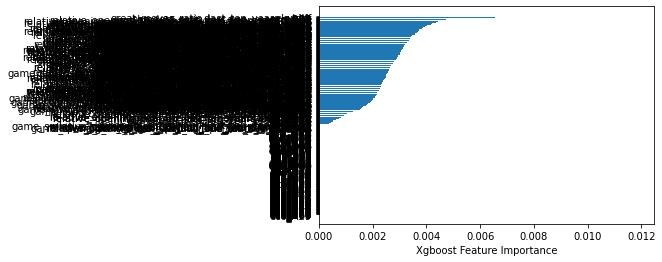

In [49]:
import matplotlib.pyplot as plt

sorted_idx = xgb_classifier.feature_importances_.argsort()
plt.barh(new_df.columns.values[sorted_idx], xgb_classifier.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [61]:
#!pip install shap
import shap

explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer.shap_values(new_df.drop(["result"], axis=1))

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


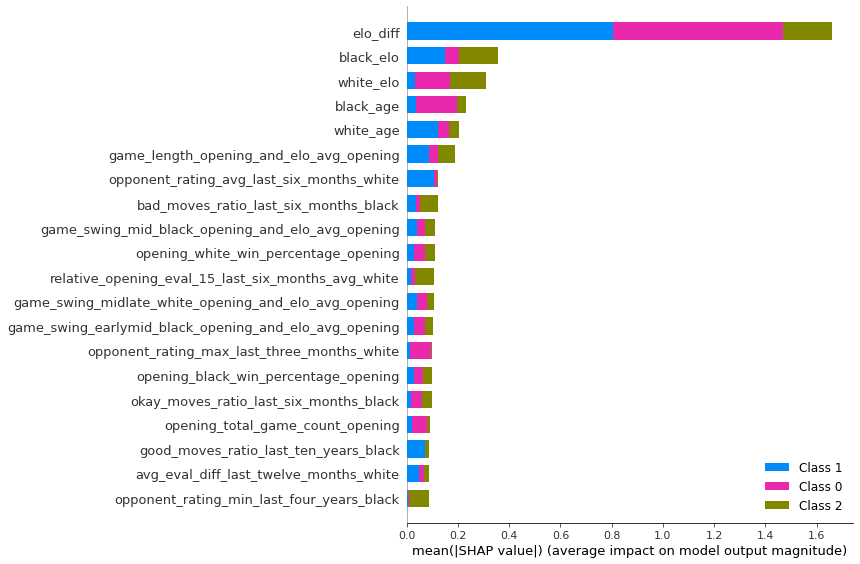

In [63]:
shap.summary_plot(shap_values, new_df.drop(["result"], axis=1), plot_type="bar")

In [71]:
shap.force_plot(explainer.expected_value[2], shap_values[2], link='logit')

shap.plots.force is slow for many thousands of rows, try subsampling your data.


In [56]:
for i in sorted_idx[660:688]:
    print(f"{new_df.columns.values[i]}, {xgb_classifier.feature_importances_[i]}")

relative_opening_eval_10_last_four_years_max_black, 0.0041691940277814865
blunders_ratio_last_four_years_black, 0.0042082928121089935
relative_opening_eval_10_last_two_years_avg_black, 0.00421885447576642
relative_opening_eval_20_last_four_years_max_white, 0.004248640034347773
eco_D01, 0.004272430203855038
best_moves_ratio_last_ten_years_black, 0.004350683651864529
opponent_rating_avg_last_six_months_black, 0.004370545037090778
relative_opening_eval_10_last_two_years_min_black, 0.004377997480332851
best_moves_ratio_last_twelve_months_black, 0.004411248955875635
relative_opening_eval_20_last_ten_years_min_white, 0.004433952737599611
eco_A03, 0.004449939820915461
relative_opening_eval_20_last_twelve_months_max_black, 0.0044798473827540874
opponent_rating_avg_last_two_years_black, 0.004484307020902634
relative_opening_eval_20_last_two_years_min_white, 0.004516023676842451
semi_blunders_ratio_last_ten_years_white, 0.004547260235995054
eco_E31, 0.004604692105203867
relative_opening_eval_15_

In [26]:
test_df = new_df[["result","elo_diff",'games_played_last_two_years_white','games_played_last_two_years_black','white_elo', 'black_elo']]
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, test_df.drop(['result'], axis=1), test_df["result"], cv=10)

array([0.408     , 0.44266667, 0.40374332, 0.44385027, 0.46791444,
       0.36096257, 0.46256684, 0.4171123 , 0.45989305, 0.47593583])

In [29]:
import dython

from dython import nominal
from dython.nominal import identify_nominal_columns, associations

categorical_features=identify_nominal_columns(new_df)
# rint(categorical_features)
# nominal.associations(df[0:20],figsize=(20,10), mark_columns=True)

associations(new_df, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)
corr = associations(new_df, figsize=(10,10))
df_complete_corr=corr['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

AttributeError: 'DataFrame' object has no attribute 'unique'

In [8]:
df.corr()

,id,white_elo,black_elo,year,month,day,day_of_week,white_fide_id,black_fide_id,is_fen_extracted,...,relative_opening_eval_20_last_six_months_avg_white,relative_opening_eval_20_last_six_months_avg_black,relative_opening_eval_20_last_twelve_months_avg_white,relative_opening_eval_20_last_twelve_months_avg_black,relative_opening_eval_20_last_two_years_avg_white,relative_opening_eval_20_last_two_years_avg_black,relative_opening_eval_20_last_four_years_avg_white,relative_opening_eval_20_last_four_years_avg_black,relative_opening_eval_20_last_ten_years_avg_white,relative_opening_eval_20_last_ten_years_avg_black
id,1.000000,-0.144165,0.152602,0.211696,-0.316985,-0.229325,-0.345860,0.185107,-0.114173,0.192937,...,NaN,0.159062,NaN,0.160358,NaN,0.161610,NaN,0.166574,NaN,0.166575
white_elo,-0.144165,1.000000,0.596249,-0.106271,-0.322633,0.288545,0.011100,-0.469107,-0.003186,-0.090547,...,NaN,0.104257,NaN,0.127562,NaN,0.123937,NaN,0.125317,NaN,0.125317
black_elo,0.152602,0.596249,1.000000,0.045589,-0.391668,0.138038,-0.100451,-0.330296,-0.407925,0.202066,...,NaN,0.166112,NaN,0.170862,NaN,0.169789,NaN,0.174683,NaN,0.174686
year,0.211696,-0.106271,0.045589,1.000000,0.220049,0.115898,-0.003384,0.120411,0.135451,0.333553,...,NaN,0.019074,NaN,0.032617,NaN,0.033700,NaN,0.040342,NaN,0.040347
month,-0.316985,-0.322633,-0.391668,0.220049,1.000000,0.015486,0.147870,0.085740,0.101059,0.099014,...,NaN,-0.081788,NaN,-0.080440,NaN,-0.079145,NaN,-0.077726,NaN,-0.077724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
relative_opening_eval_20_last_two_years_avg_black,0.161610,0.123937,0.169789,0.033700,-0.079145,0.157575,-0.265611,-0.183821,-0.037142,0.030727,...,NaN,0.998852,NaN,0.999900,NaN,1.000000,NaN,0.999906,NaN,0.999906
relative_opening_eval_20_last_four_years_avg_white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relative_opening_eval_20_last_four_years_avg_black,0.166574,0.125317,0.174683,0.040342,-0.077726,0.162711,-0.267683,-0.186771,-0.040823,0.036538,...,NaN,0.998816,NaN,0.999864,NaN,0.999906,NaN,1.000000,NaN,1.000000
relative_opening_eval_20_last_ten_years_avg_white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dtypes

id                                                      int64
white                                                  object
white_elo                                               int64
black                                                  object
black_elo                                             float64
                                                       ...   
relative_opening_eval_20_last_two_years_avg_black     float64
relative_opening_eval_20_last_four_years_avg_white    float64
relative_opening_eval_20_last_four_years_avg_black    float64
relative_opening_eval_20_last_ten_years_avg_white     float64
relative_opening_eval_20_last_ten_years_avg_black     float64
Length: 329, dtype: object

In [5]:
df.corrwith(df['result']).sort_values(ascending=False)

TypeError: unsupported operand type(s) for /: 'str' and 'int'